In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


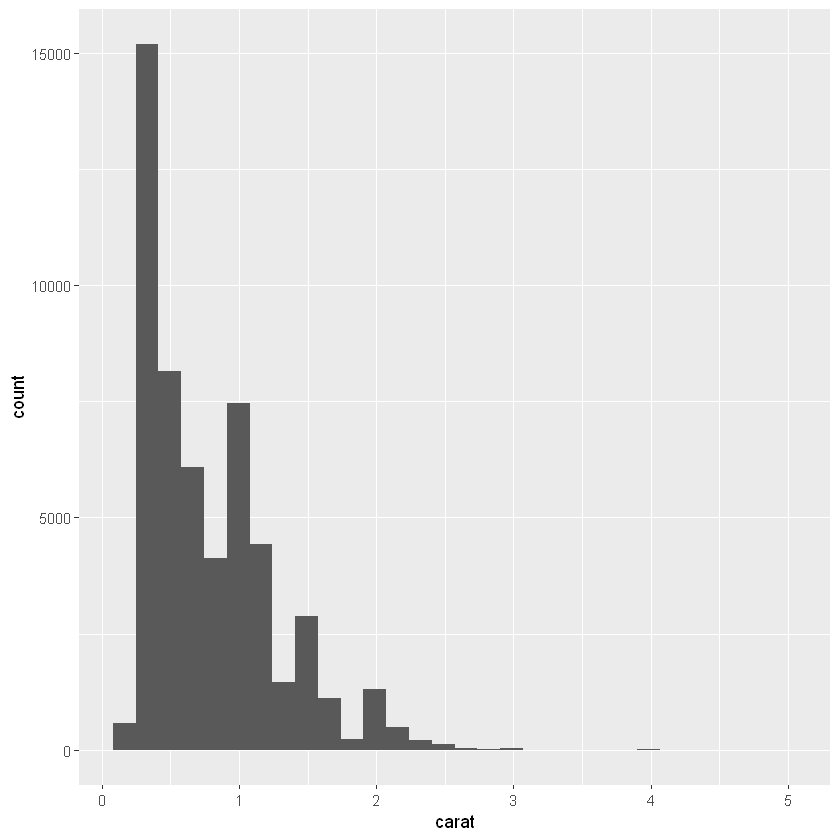

In [2]:
ggplot(diamonds, aes(carat)) +
  geom_histogram()

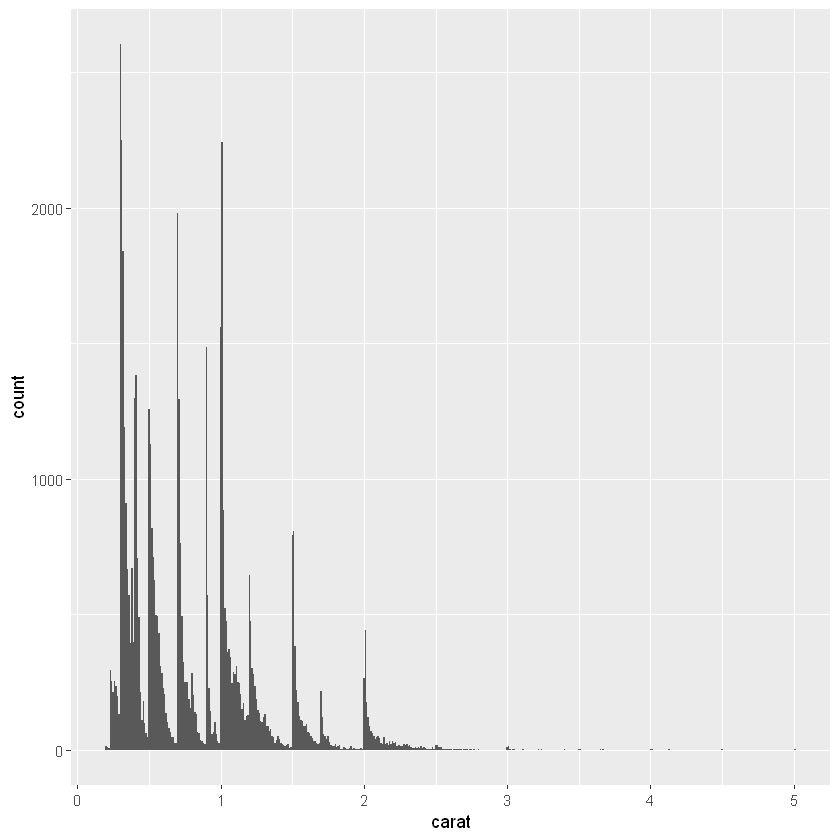

In [3]:
ggplot(diamonds, aes(carat)) +
  geom_histogram(binwidth = 0.01)

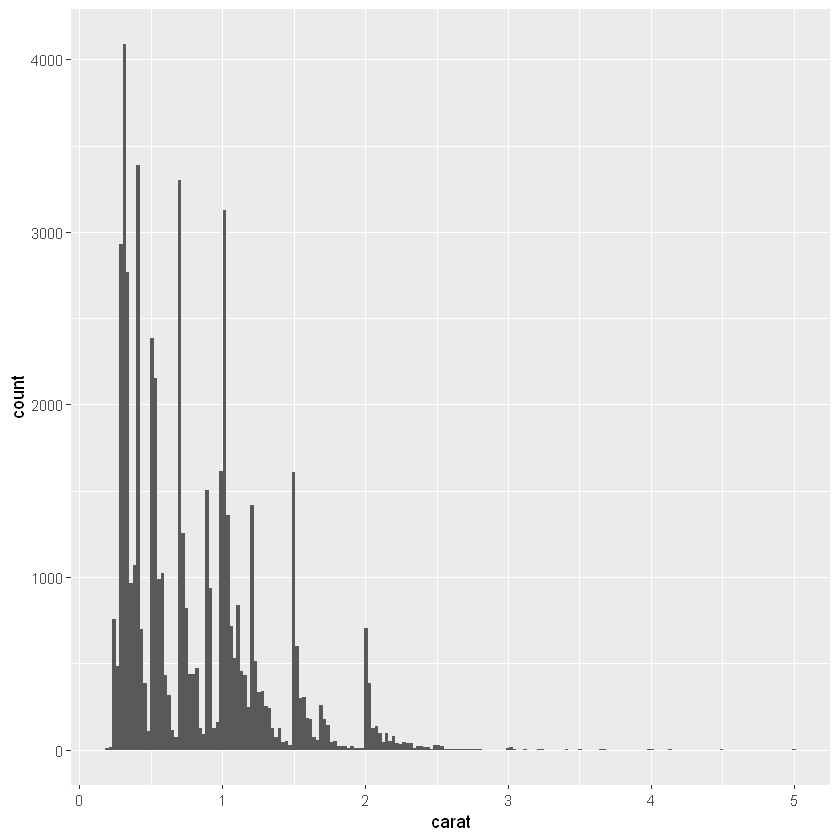

In [4]:
ggplot(diamonds, aes(carat)) +
  geom_histogram(bins = 200)

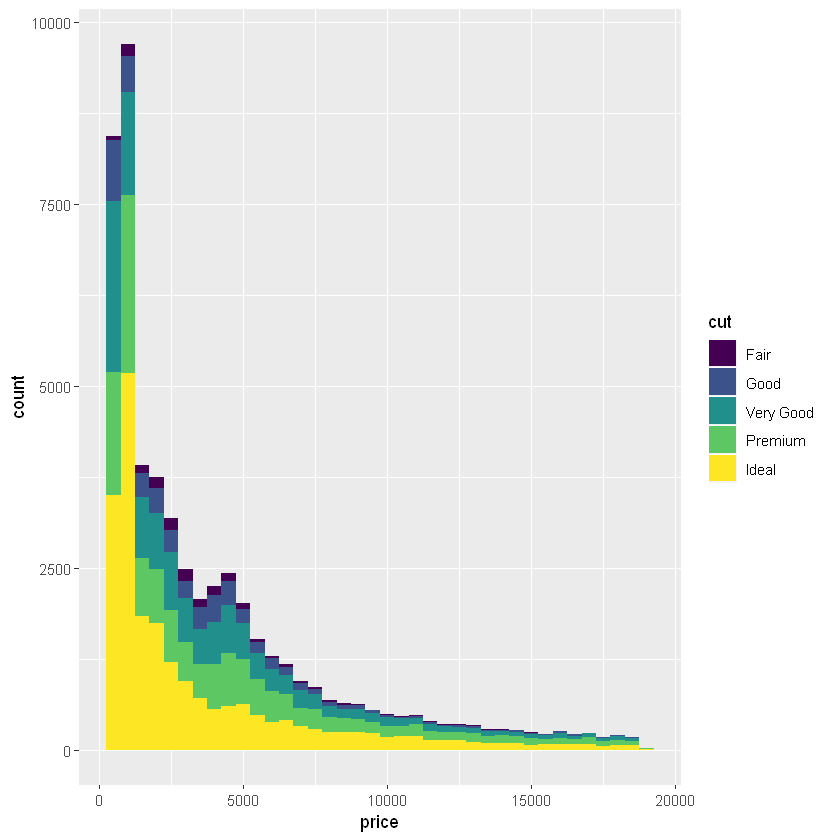

In [5]:
# Rather than stacking histograms, it's easier to compare
# frequency polygons

ggplot(diamonds, aes(price, fill = cut)) +
  geom_histogram(binwidth = 500)

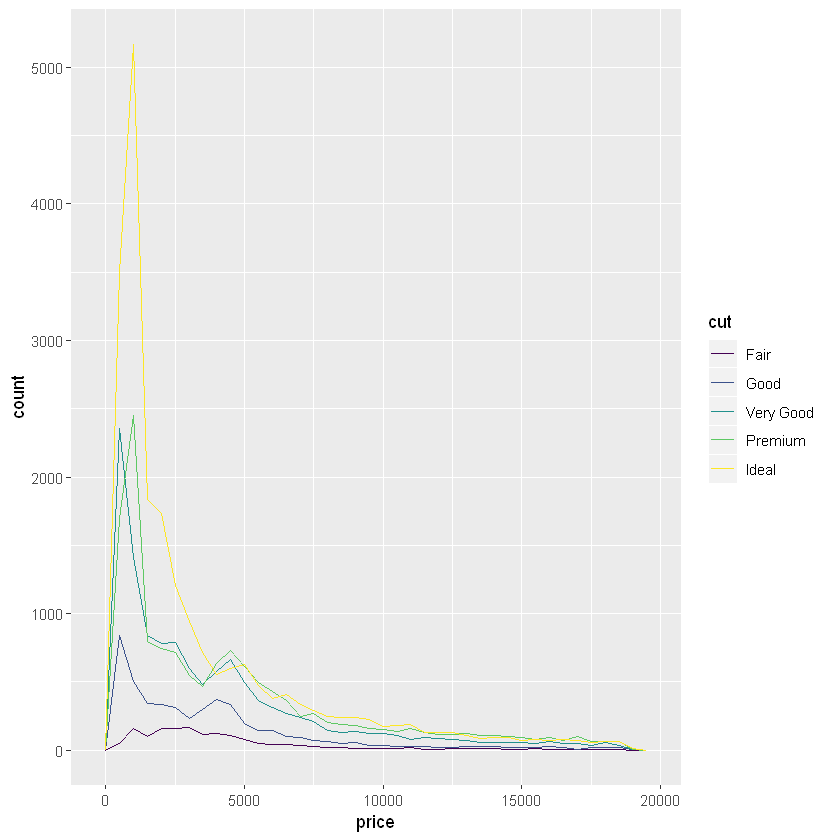

In [6]:
ggplot(diamonds, aes(price, colour = cut)) +
  geom_freqpoly(binwidth = 500)

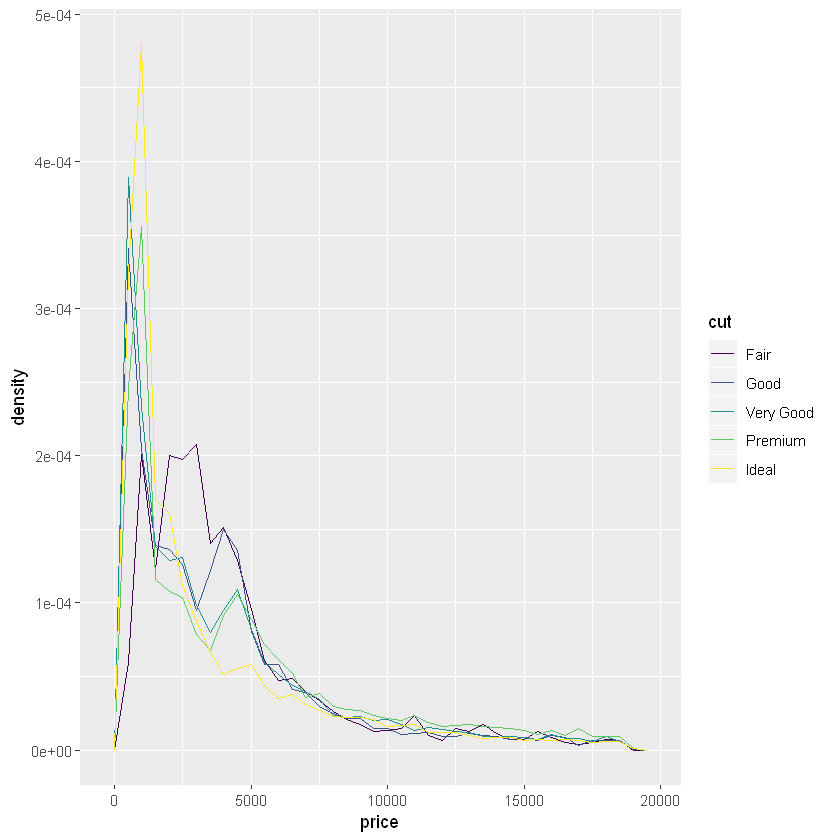

In [7]:
# To make it easier to compare distributions with very
# different counts, put density on the y - axis instead of
# the default count

ggplot(diamonds, aes(price, stat(density), colour = cut)) +
  geom_freqpoly(binwidth = 500)

Loading required package: ggplot2movies


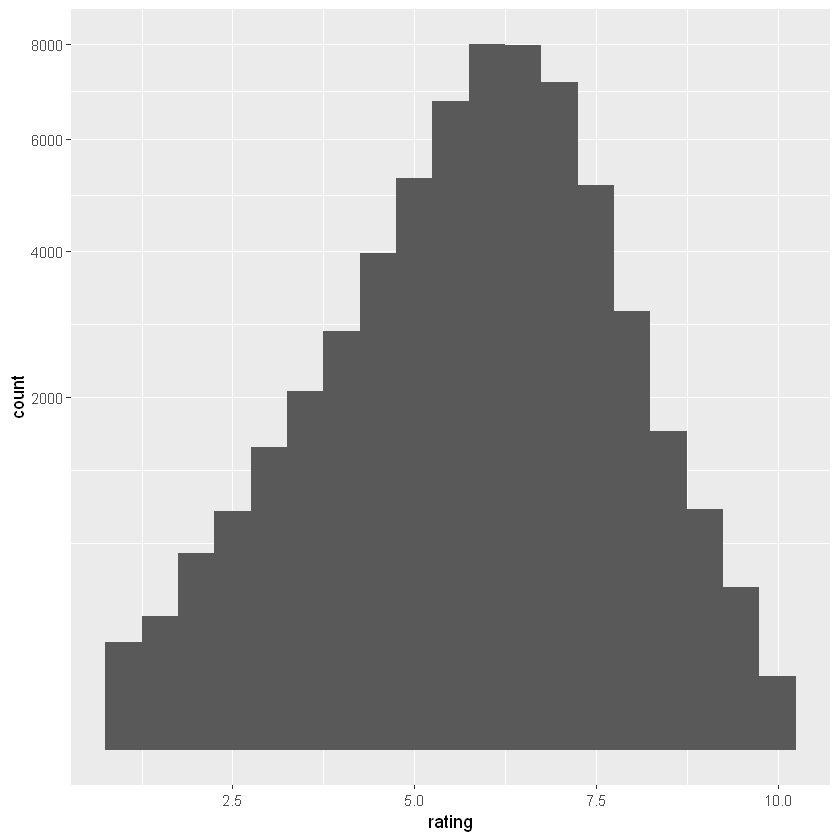

In [9]:
if(require("ggplot2movies")) {
    # Often we don't want the height of the bar to 
    # represent the count of observations, but the sum of some
    # other variable. For e.g., the following plot shows the
    # number of movies in each rating.
    
    m <- ggplot(movies, aes(rating))
    m + geom_histogram(binwidth = 0.1)
    
    # If, however, we want to see the number of votes cast in
    # each category, we need to weight by the votes variable
    
    m + geom_histogram(aes(weight = votes), binwidth = 0.1) +
      ylab("votes")
    
    # For transformed scales, binwidth applies to the 
    # transformed data. The bins have constant width on
    # the transformed scale.
    
    m + geom_histogram() + scale_x_log10()
    m + geom_histogram(binwidth = 0.05) + scale_x_log10()
    
    # For transformed coordinate systems, the binwidth
    # applies to the raw data. The bins have constant width
    # on the original scale.
    
    # Using log scales doesn't work here, as the first bar
    # is anchored at 0 and so when transformed becomes 
    # negative infinity. This isn't a problem when
    # transforming the scales, as no observations have 0 
    # ratings.
    
    m + geom_histogram(boundary = 0) + coord_trans(x = "log10")
    
    # Use boundary = 0, to make sure we don't take sqrt of
    # negative values
    
    m + geom_histogram(boundary = 0) + coord_trans(x = "sqrt")
    
    # y - axis can also be transformed. Remember that the base
    # of the bars have value 0, so log transformations are
    # not appropriate
    
    m <- ggplot(movies, aes(x = rating))
    m + geom_histogram(binwidth = 0.5) + scale_y_sqrt()
}

In [10]:
# You can specify a function for calculating binwidth,
# particularly useful when faceting along variables with
# different ranges

mtlong <- reshape2::melt(mtcars)

No id variables; using all as measure variables


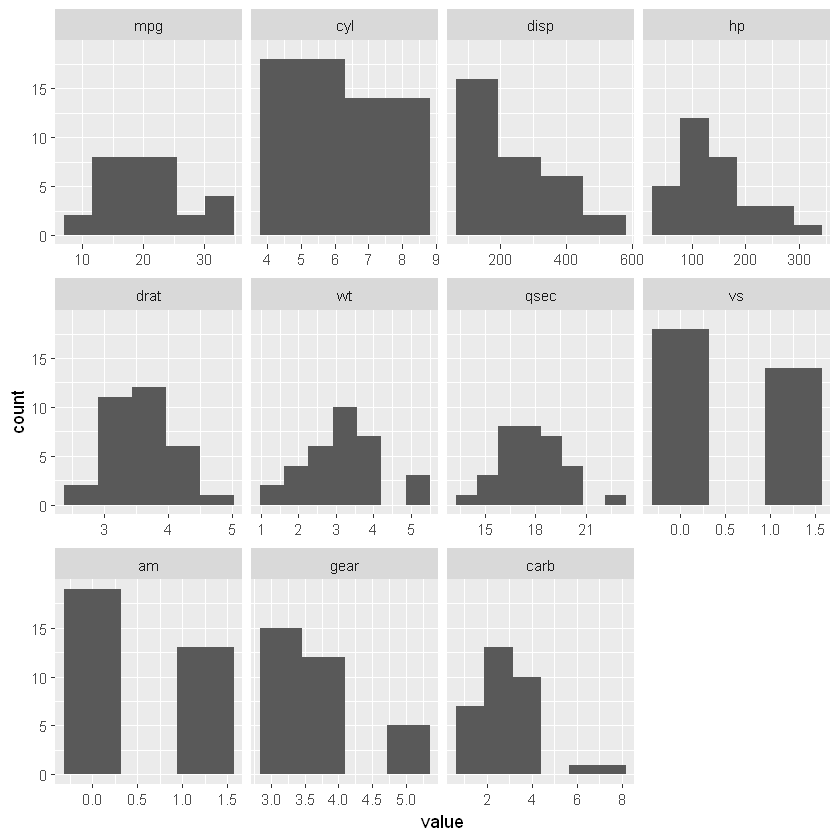

In [11]:
ggplot(mtlong, aes(value)) +
  facet_wrap(~variable, scales = 'free_x') +
  geom_histogram(binwidth = function(x) 2 * IQR(x) / (length(x) ^ (1/3)))